In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

In [10]:
results = []

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

for name, model in models.items():
    metrics = evaluate_model(model, X_test_scaled, y_test)
    results.append([name] + metrics)

In [11]:
columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

comparison_df = pd.DataFrame(results, columns=columns)
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.982456,0.986111,0.986111,0.986111
1,Decision Tree,0.912281,0.955882,0.902778,0.928571
2,Random Forest,0.956140,0.958904,0.972222,0.965517
3,SVM,0.982456,0.986111,0.986111,0.986111


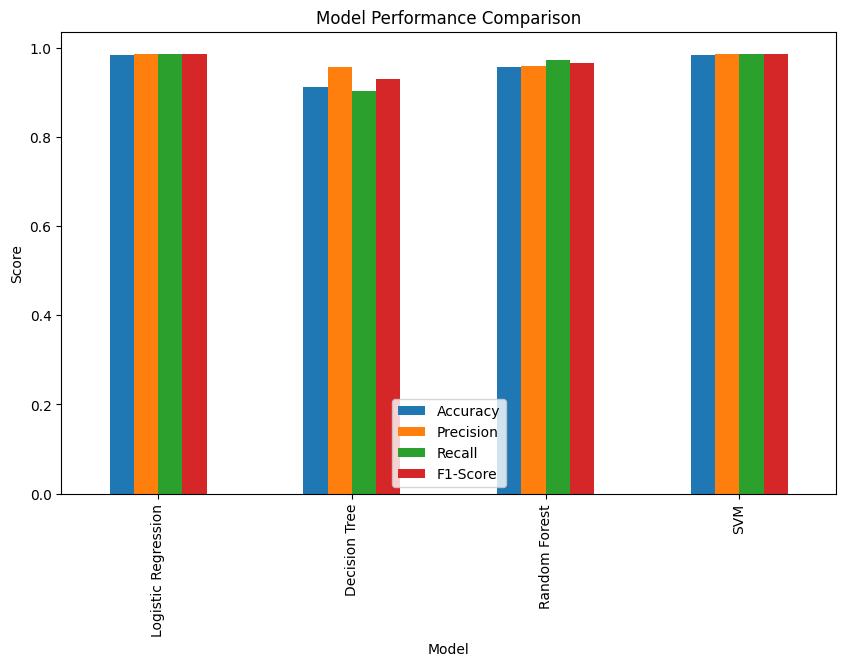

In [12]:
comparison_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

In [13]:
for name, model in models.items():
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} -> Train: {train_score:.3f}, Test: {test_score:.3f}")

Logistic Regression -> Train: 0.989, Test: 0.982
Decision Tree -> Train: 1.000, Test: 0.912
Random Forest -> Train: 1.000, Test: 0.956
SVM -> Train: 0.982, Test: 0.982


In [14]:
best_model = rf

In [15]:
import joblib
joblib.dump(best_model, "best_model_task14.pkl")

['best_model_task14.pkl']

In [ ]:
The intern trained and compared multiple classification models, evaluated performance using accuracy, precision, recall, and F1-score, detected overfitting using train-test comparison, and selected the best performing model based on evaluation metrics.
